**Step 1: Import packages and Classes**

In [7]:
import pandas as pd
import numpy as np

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data=pd.read_csv("/content/Salary.csv")

In [12]:
data.head()#head portion of data checks the data uploaded or not

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [13]:
data.tail()#Last 5 rows of data

,YearsExperience,Salary
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


In [14]:
data.columns#so we have 2 columns years of experience and salary

Index(['YearsExperience', 'Salary'], dtype='object')

In [17]:
#Lets check the dimension of the data set
data.shape

(35, 2)

In [18]:
# Printing the first 5 records of the data set
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [19]:
data.describe() # Describe will give the total count of data with mean value, min ,max,standard deviation etc 

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


**Missing Value Detection and Treatment**

The following values in a data set are considered to be missing values.

1. Blank Values

2. NaN

3. null

4. Some countinuous columns might have 0's to indicate missing data.

In [20]:
#Lets start by checking the count of records in each column of the data set
#If the count of records is lesser than the total number of records i.e. 788, we can conclude that there
#are blank records.

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [21]:
data.isnull()#to check if we have null value present in the data or not

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [22]:
data.isnull().any()#to check if we have any null value or not
#we dont have any null value i.e. y it shows false

YearsExperience    False
Salary             False
dtype: bool

In [23]:
data.isnull().sum()#sum of null vaulues i.e. 0 (no null value present in our data)

YearsExperience    0
Salary             0
dtype: int64

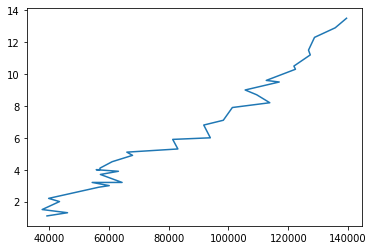

In [24]:
plt.plot(data['Salary'],data['YearsExperience'])#(Salary represents y- axis and YearExperience represents x-axis )

graph shows more experience more salary

less experience less salary

In [26]:
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


Lets now plot a corr-plot(correlation plot). This plot will help us understand if there is multi collunearity in the dataset.

<ipython-input-28-81a7b29c853c>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


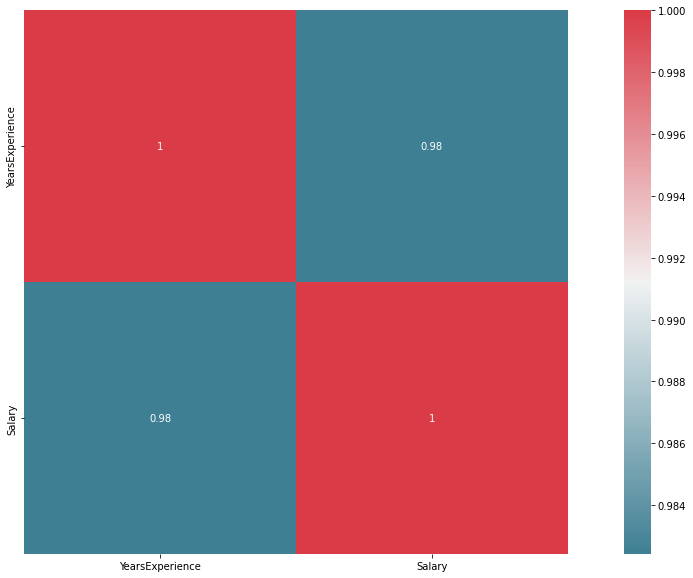

In [28]:
f, ax = plt.subplots(figsize=(20, 10)) 
corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)


In [51]:
#Before making the model in linear regression we first divide the data set into 4 parts training(model can see how the data can be trained) , testing(model will not see the data used for testing)
#while going to test new data that time our model can see the data
from sklearn.model_selection import train_test_split

In [52]:
#Before splitting our data set we first use
x = data.drop('Salary',axis = 1)#it will drop the particular column i.e salary column

In [53]:
y=data['Salary']#Y is the column that contains salary.

In [54]:
print(x.head())#x = year of experience
print(y.head())#y = salary.

   YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2
0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64


In [57]:
#Now we are going to make it in 4 parts
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)
#test size 0.2 means 80% training part used
#random 42 is used to take data randomly any data from anywhere


In [58]:
from sklearn.linear_model import LinearRegression#Here we call our regression model
L=LinearRegression()

In [59]:
#Now we are going to fit the model with the data set
L.fit(xtrain,ytrain)

LinearRegression()

In [60]:
y_pred=L.predict(xtest)

In [61]:
print(L.score(xtest, ytest))#This will show the score for predicted value.

0.8914234140042779


In [63]:
print("predicted salary",y_pred)#predicted value

predicted salary [110576.91706292  64251.57268882 103713.90308157  89987.87511888
  71114.58667017 119155.68453961  80551.23089452]


In [65]:
print("actual salary",y)#Actual value

actual salary 0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
30    127345
31    126756
32    128765
33    135675
34    139465
Name: Salary, dtype: int64
